In [1]:
import pickle as pk
import pandexo.engine.justplotit as jpi
datapath = "/home/noud333/bachelorproject/data"


In [2]:
# Pandexo visualisation constants
filename_1 = f"V1298TauB_MIRI"
filename_2 = f"V1298TauB_MIRI_radiative"


inst_list = ['NIRSpec G140M', 'NIRSpec G235M', 'NIRSpec G395M']
inst_list = ['MIRI LRS']

# Title of the plot
pandexo_title = 'V1298Tau B'

pandexo_R = 20          # amount of bins
pandexo_num_tran = 1     # number of transits
pandexo_model = False
pandexo_x_range = [.8,5.2] # in micron
pandexo_x_range = [5,14]

In [27]:
# Visualising Pandexo

out = pk.load(open(f"{datapath}/pandexo/{filename_1}.p", 'rb'))


list_out = []

if len(inst_list) > 1:
    for i in range(len(inst_list)):
        list_out.append(out[i][inst_list[i]])

else:
    list_out = out


x_1,y_1, e_1 = jpi.jwst_1d_spec(list_out, title = pandexo_title, R = pandexo_R, num_tran = pandexo_num_tran, model = pandexo_model, x_range = pandexo_x_range, output_file=f'{datapath}/pandexo/{filename_1}.html')

# Visualising Pandexo

out = pk.load(open(f"{datapath}/pandexo/{filename_2}.p", 'rb'))


list_out = []

if len(inst_list) > 1:
    for i in range(len(inst_list)):
        list_out.append(out[i][inst_list[i]])

else:
    list_out = out


x_2,y_2, e_2 = jpi.jwst_1d_spec(list_out, title = pandexo_title, R = pandexo_R, num_tran = pandexo_num_tran, model = pandexo_model, x_range = pandexo_x_range, output_file=f'{datapath}/pandexo/{filename_2}.html')


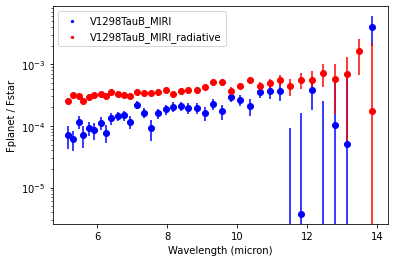

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x_1_list = x_1[0].tolist()
y_1_list = y_1[0].tolist()
e_1_list = e_1[0].tolist()
x_2_list = x_2[0].tolist()
y_2_list = y_2[0].tolist()
e_2_list = e_2[0].tolist()

s=5

plt.scatter(x_1_list, y_1_list, c='b',label=filename_1, s=s)

plt.errorbar(x_1_list, y_1_list, yerr= e_1_list, c='b', fmt='o')

plt.scatter(x_2_list, y_2_list, c='r', label=filename_2, s=s)
plt.errorbar(x_2_list, y_2_list, yerr= e_2_list, c='r', fmt='o')

plt.xlabel("Wavelength (micron)")
plt.ylabel("Fplanet / Fstar")

plt.yscale('log')
plt.legend()
plt.show()